In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from seaborn import lmplot

In [2]:
import math
import matplotlib.cm as cm
import pandas as pd
import plotly.express as px
from matplotlib.pyplot import figure


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [4]:
df = pd.read_csv("interseccionD.csv") #vejiga

In [5]:
df

,Vejiga_D35,Recto_D35,FemL_D20,FemR_D20,Ivejiga,Irecto,VolVejiga,VolRecto,Ivejiga_porc,Irecto_porc,color,volPTV
0,4412,4192,2116,2761,20,16,172,150,11.627907,10.666667,g,721
1,3822,4578,2589,1986,6,31,71,111,8.450704,27.927928,g,706
2,4267,4069,2421,2372,15,4,65,53,23.076923,7.547170,g,749
3,4315,4949,2477,2546,52,22,345,64,15.072464,34.375000,g,758
4,4421,4413,2649,2828,26,21,207,118,12.560386,17.796610,g,781
5,4980,4933,2027,1955,172,51,295,91,58.305085,56.043956,g,794
6,4324,3910,2207,2565,14,9,116,141,12.068966,6.382979,g,865
7,4309,4487,2552,2824,33,21,301,88,10.963455,23.863636,g,867
8,4302,4743,2669,2520,31,13,327,58,9.480122,22.413793,g,878
9,4608,4989,1791,1747,87,33,295,51,29.491525,64.705882,g,899


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


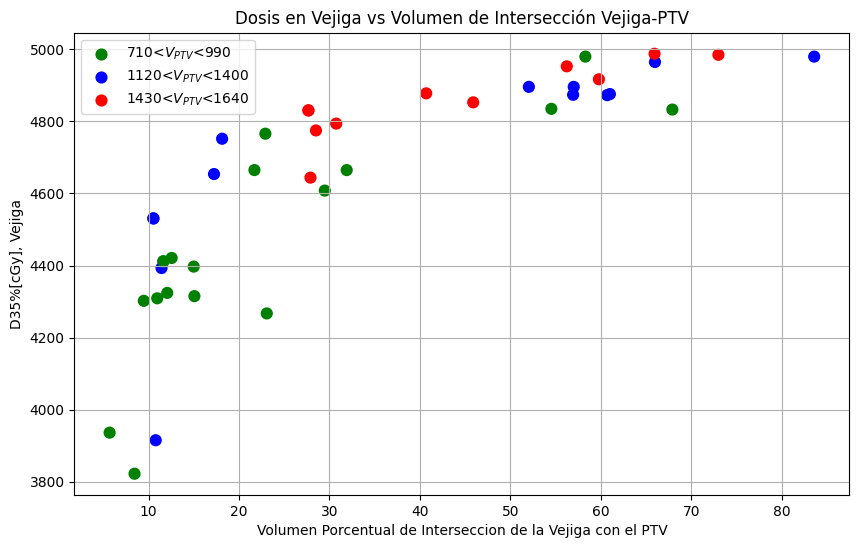

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Ivejiga_porc'], df['Vejiga_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
#clb =  plt.colorbar()
#clb.set_label('Prioridad', labelpad=-20, y=1.07, rotation=0)
#plt.hlines(y=95.4, xmin=4600, xmax=4700, label='95.4%', colors='green')
#plt.vlines(x=4627, ymin=95, ymax=96, label='4627 cGy',colors='blue')
plt.scatter(df['Ivejiga_porc'][0], df['Vejiga_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Ivejiga_porc'][22], df['Vejiga_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Ivejiga_porc'][37], df['Vejiga_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Vejiga vs Volumen de Intersección Vejiga-PTV")
plt.xlabel("Volumen Porcentual de Interseccion de la Vejiga con el PTV")
plt.ylabel("D35%[cGy], Vejiga") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisInterseccionVejiga.eps', bbox_inches='tight')
plt.savefig('DosisInterseccionVejiga.png', bbox_inches='tight')
plt.show()

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    f = a/(b+np.exp(-c*x))

    return f

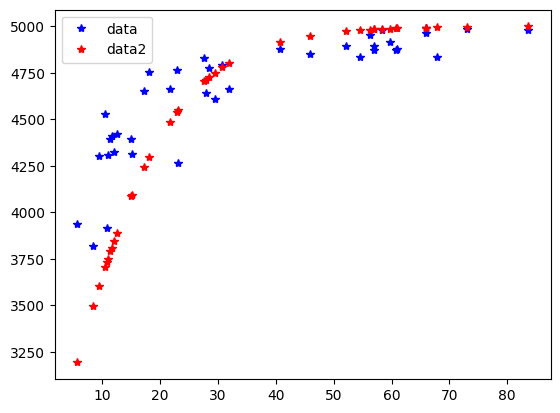

In [8]:
xdata = df['Ivejiga_porc']
ydata = df['Vejiga_D35']
y = func(xdata, 5000,1,1/10)
plt.plot(xdata, ydata, 'b*', label='data')
plt.plot(xdata, y, 'r*', label='data2')
plt.legend(loc='best')



In [9]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

/tmp/ipykernel_17842/2425844347.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, xdata, ydata)


array([1.24645945e+02, 2.68455180e-02, 3.79736986e+01])

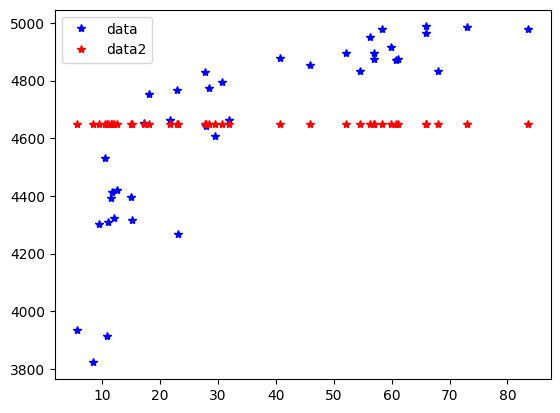

In [10]:
xdata = df['Ivejiga_porc']
ydata = df['Vejiga_D35']
y = func(xdata, 124.6,0.0268, 37.97)
plt.plot(xdata, ydata, 'b*', label='data')
plt.plot(xdata, y, 'r*', label='data2')
plt.legend(loc='best')


In [11]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a,b):
    f = a/(1+np.exp(-b*x))

    return f

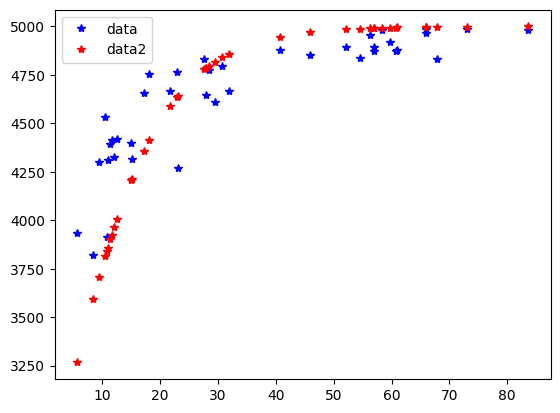

In [12]:
xdata = df['Ivejiga_porc']
ydata = df['Vejiga_D35']
y = func(xdata, 5000, 1/9)
plt.plot(xdata, ydata, 'b*', label='data')
plt.plot(xdata, y, 'r*', label='data2')
plt.legend(loc='best')
#Normalizar data


In [13]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

/tmp/ipykernel_17842/2425844347.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, xdata, ydata)


array([4643.07692308, 5348.54928094])

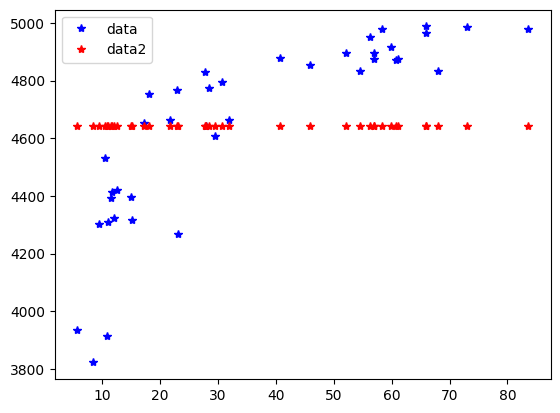

In [14]:
xdata = df['Ivejiga_porc']
ydata = df['Vejiga_D35']
y = func(xdata, 4643, 5348)
plt.plot(xdata, ydata, 'b*', label='data')
plt.plot(xdata, y, 'r*', label='data2')
plt.legend(loc='best')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


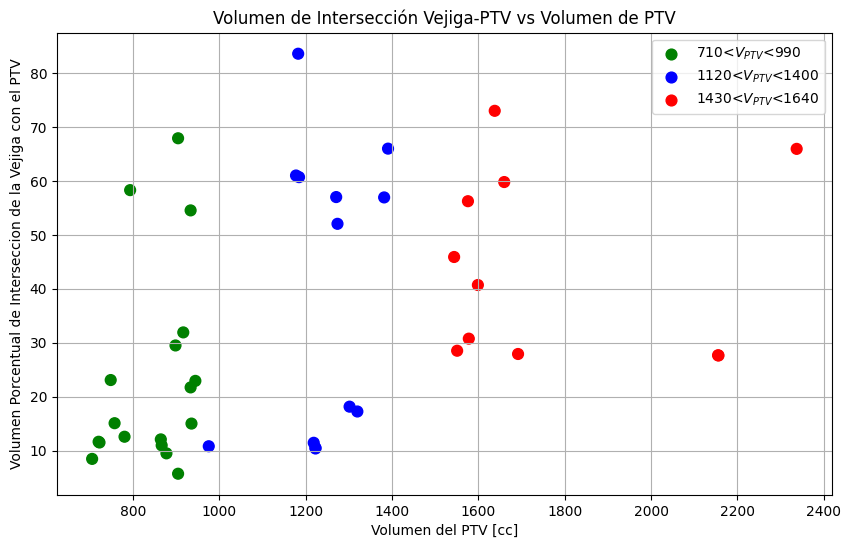

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Ivejiga_porc'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Ivejiga_porc'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Ivejiga_porc'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Ivejiga_porc'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Volumen de Intersección Vejiga-PTV vs Volumen de PTV")
plt.ylabel("Volumen Porcentual de Interseccion de la Vejiga con el PTV")
plt.xlabel("Volumen del PTV [cc]") #volumen del PTV
plt.legend(loc='best')
plt.savefig('VolumenInterseccionVejiga.eps', bbox_inches='tight')
plt.savefig('VolumenInterseccionVejiga.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


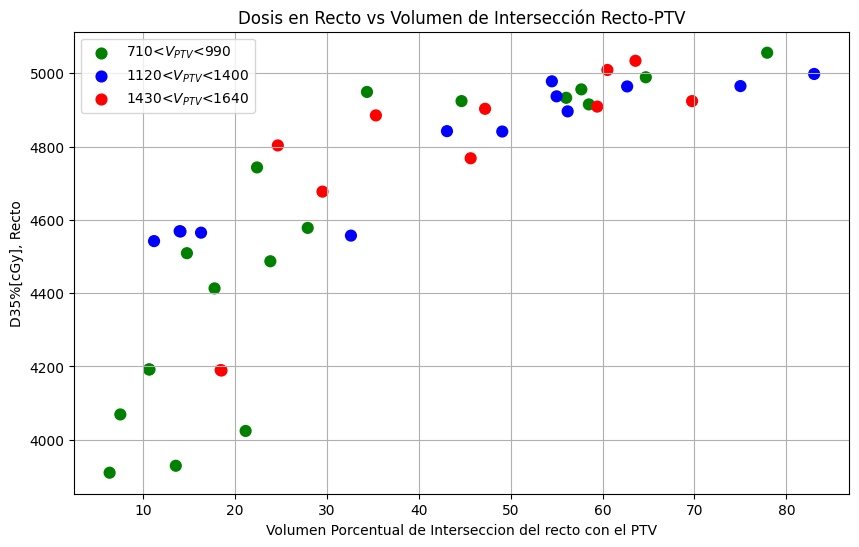

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Irecto_porc'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
plt.scatter(df['Irecto_porc'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Irecto_porc'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Irecto_porc'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Volumen de Intersección Recto-PTV")
plt.xlabel("Volumen Porcentual de Interseccion del recto con el PTV")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisInterseccionRecto.eps', bbox_inches='tight')
plt.savefig('DosisInterseccionRecto.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


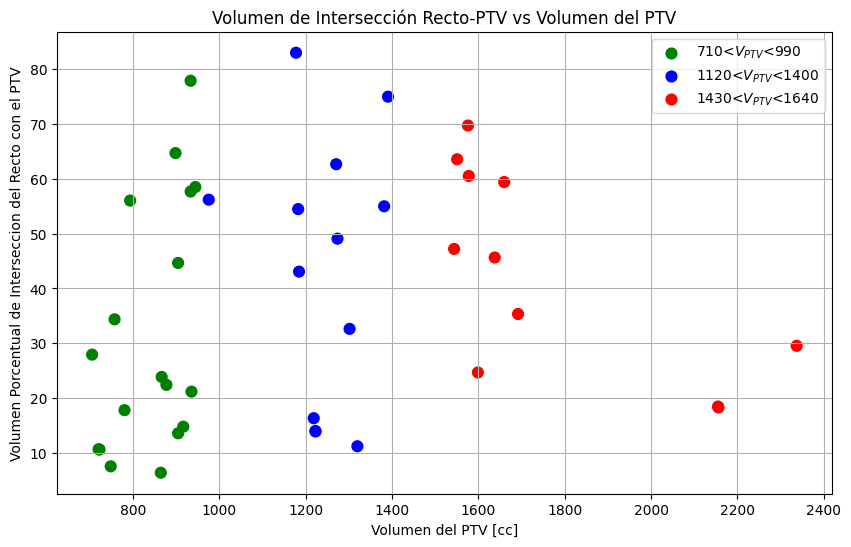

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Irecto_porc'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Irecto_porc'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Irecto_porc'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Irecto_porc'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Volumen de Intersección Recto-PTV vs Volumen del PTV")
plt.ylabel("Volumen Porcentual de Interseccion del Recto con el PTV")
plt.xlabel("Volumen del PTV [cc]") #volumen del PTV
plt.legend(loc='best')
plt.savefig('VolumenInterseccionRecto.eps', bbox_inches='tight')
plt.savefig('VolumenInterseccionRecto.png', bbox_inches='tight')
plt.show()

In [18]:
#df

In [19]:
C = df[df["color"]=='g']
D = df[df["color"]=='b']
E =  df[df["color"]=='r']


In [20]:
C = C.rename(columns={"Vejiga_D35": "Vejiga_D35 Pequeño"})
D = D.rename(columns={"Vejiga_D35": "Vejiga_D35 Mediano"})
E = E.rename(columns={"Vejiga_D35": "Vejiga_D35 Grande"})

In [21]:
data = [C["Vejiga_D35 Pequeño"], D["Vejiga_D35 Mediano"], E["Vejiga_D35 Grande"]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


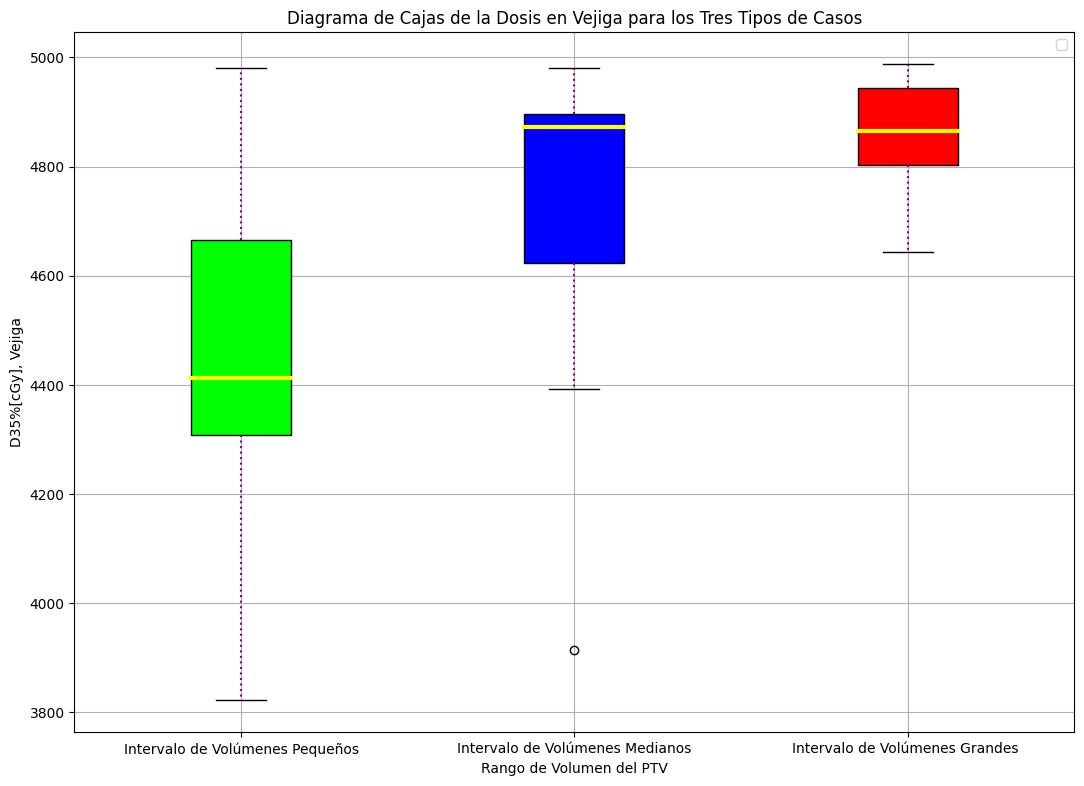

In [22]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, patch_artist = True)
# changing color and linewidth of
# medians
colors = ['#00FF00', '#0000FF', 
          '#FF0000']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
    
for median in bp['medians']:
    median.set(color ='yellow',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
#bp = ax.boxplot(data)
ax.set_xticklabels(['Intervalo de Volúmenes Pequeños', 'Intervalo de Volúmenes Medianos',
                    'Intervalo de Volúmenes Grandes '])
plt.grid()
plt.title("Diagrama de Cajas de la Dosis en Vejiga para los Tres Tipos de Casos")
plt.xlabel("Rango de Volumen del PTV")
plt.ylabel("D35%[cGy], Vejiga") #volumen del PTV
plt.legend(loc='best')
plt.savefig('boxplotPTV_Vejiga.eps', bbox_inches='tight')
plt.savefig('boxplotPTV_Vejiga.png', bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


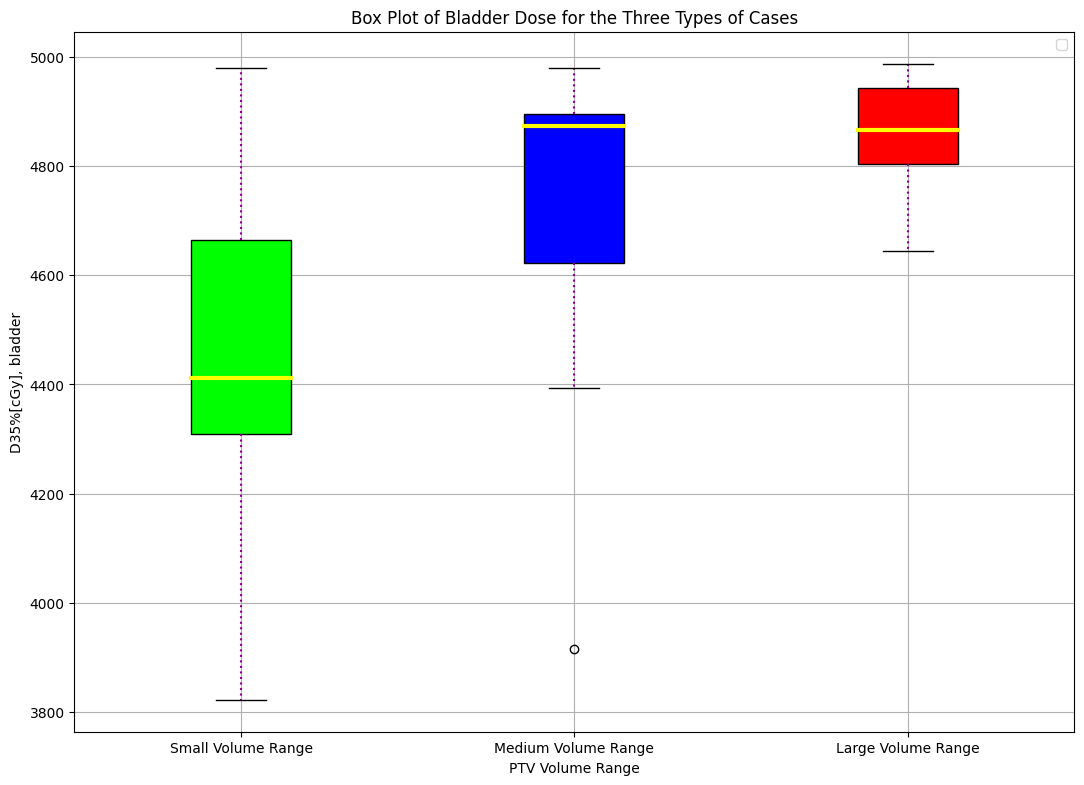

In [26]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, patch_artist = True)
# changing color and linewidth of
# medians
colors = ['#00FF00', '#0000FF', 
          '#FF0000']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
    
for median in bp['medians']:
    median.set(color ='yellow',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
#bp = ax.boxplot(data)
ax.set_xticklabels(['Small Volume Range', 'Medium Volume Range',
                    'Large Volume Range'])
plt.grid()
plt.title("Box Plot of Bladder Dose for the Three Types of Cases")
plt.xlabel("PTV Volume Range")
plt.ylabel("D35%[cGy], bladder") #volumen del PTV
plt.legend(loc='best')
plt.savefig('boxplotPTV_Vejiga.eps', bbox_inches='tight')
plt.savefig('boxplotPTV_Vejiga.png', bbox_inches='tight')
plt.show()


In [27]:
C = C.rename(columns={'Recto_D35': 'Recto_D35 Pequeño'})
D = D.rename(columns={'Recto_D35': "Recto_D35 Mediano"})
E = E.rename(columns={'Recto_D35': "Recto_D35 Grande"})

In [25]:
data2 = [C["Recto_D35 Pequeño"], D["Recto_D35 Mediano"], E["Recto_D35 Grande"]]

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


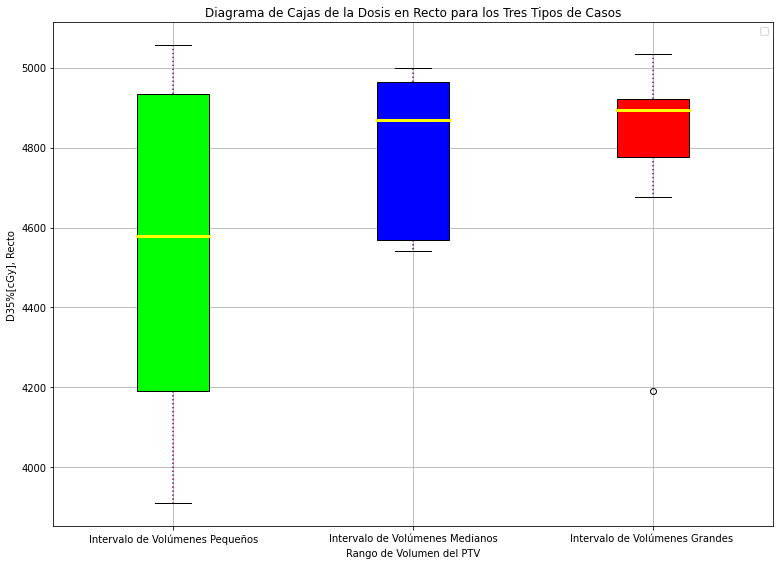

In [37]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data2, patch_artist = True)
# changing color and linewidth of
# medians
colors = ['#00FF00', '#0000FF', 
          '#FF0000']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
    
for median in bp['medians']:
    median.set(color ='yellow',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

#bp = ax.boxplot(data)
ax.set_xticklabels(['Intervalo de Volúmenes Pequeños', 'Intervalo de Volúmenes Medianos',
                    'Intervalo de Volúmenes Grandes '])
plt.grid()
plt.title("Diagrama de Cajas de la Dosis en Recto para los Tres Tipos de Casos")
plt.xlabel("Rango de Volumen del PTV")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('boxplotPTV_Recto.eps', bbox_inches='tight')
plt.savefig('boxplotPTV_Recto.png', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


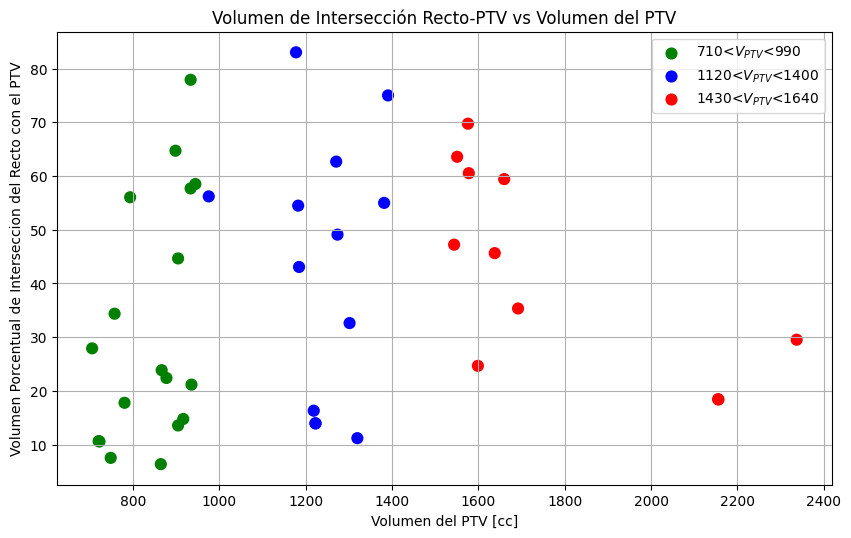

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Irecto_porc'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Irecto_porc'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Irecto_porc'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Irecto_porc'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Volumen de Intersección Recto-PTV vs Volumen del PTV")
plt.ylabel("Volumen Porcentual de Interseccion del Recto con el PTV")
plt.xlabel("Volumen del PTV [cc]") #volumen del PTV
plt.legend(loc='best')
plt.savefig('VolumenInterseccionRecto.eps', bbox_inches='tight')
plt.savefig('VolumenInterseccionRecto.png', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


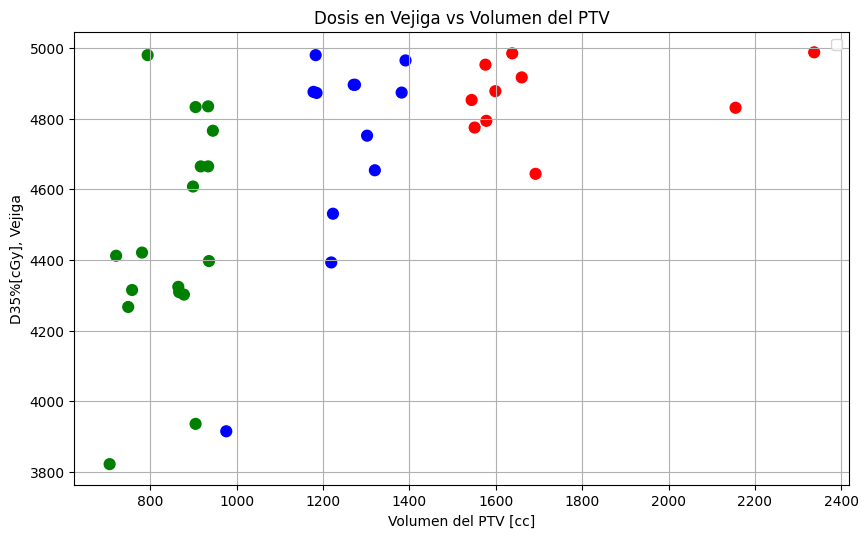

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Vejiga_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

#plt.scatter(df['Ivejiga_porc'][0], df['Vejiga_D35'][0], color=df["color"][0] , s=60,label='710<V<990')
#plt.scatter(df['Ivejiga_porc'][22], df['Vejiga_D35'][22], color=df["color"][22] , s=60,label='1120<V<1400')
#plt.scatter(df['Ivejiga_porc'][37], df['Vejiga_D35'][37], color=df["color"][37] , s=60,label='1430<V<1640')

plt.grid()
plt.title("Dosis en Vejiga vs Volumen del PTV")
plt.xlabel("Volumen del PTV [cc]")
plt.ylabel("D35%[cGy], Vejiga") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisVolumenPTV_Vejiga.eps', bbox_inches='tight')
plt.savefig('DosisVolumenPTV_Vejiga.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


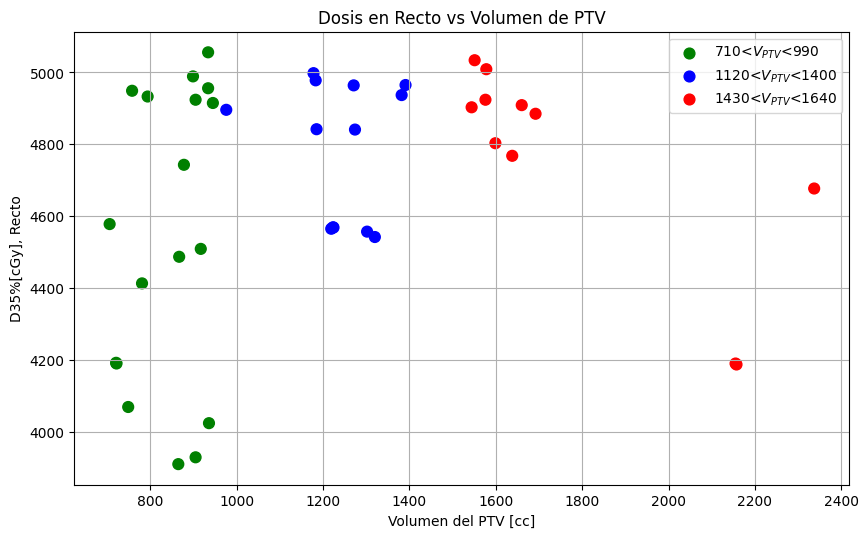

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Volumen de PTV")
plt.xlabel("Volumen del PTV [cc]")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisVolumenPTV_Recto.eps', bbox_inches='tight')
plt.savefig('DosisVolumenPTV_Recto.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


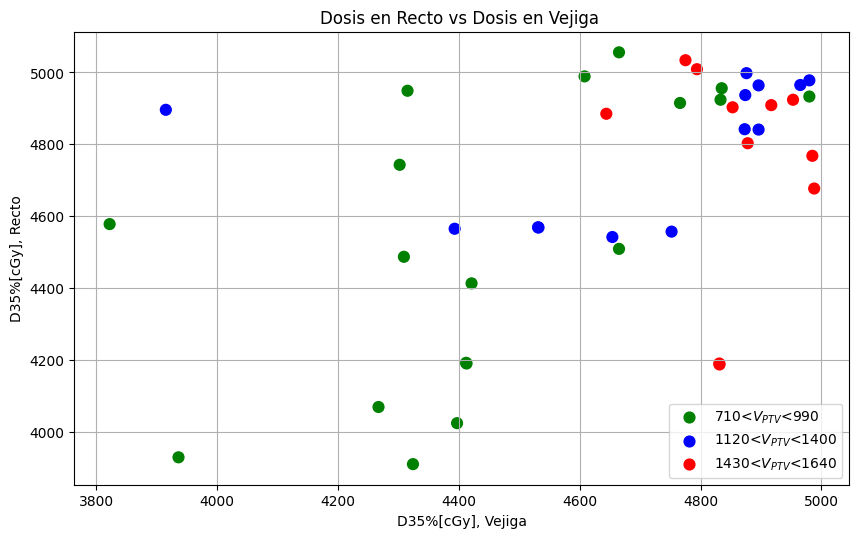

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Vejiga_D35'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['Vejiga_D35'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Vejiga_D35'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Vejiga_D35'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Dosis en Vejiga ")
plt.xlabel("D35%[cGy], Vejiga")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisRecto_Vejiga.eps', bbox_inches='tight')
plt.savefig('DosisRecto_Vejiga.png', bbox_inches='tight')
plt.show()